## Import
라이브러리 및 데이터  Library& Data

In [ ]:
import pandas as pd
import random
import os
import numpy as np



from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor

In [ ]:
#데이터 불러오기
train=pd.read_csv('/content/train.csv') #모델 학습 파일
test=pd.read_csv('/content/test.csv') # 모델 시험지 파일
sample_submission=pd.read_csv('/content/sample_submission.csv') #답안지 파일

2. 탐색적 자료 분석(EDA)


In [ ]:
#train 데이터 위에서 5개 행 보여주기
#데이터가 수치형이므로 문자->수치로 바꾸는 추가적인 작업은 없음.  
train.head(5)

,ID,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,...,Y_05,Y_06,Y_07,Y_08,Y_09,Y_10,Y_11,Y_12,Y_13,Y_14
0,TRAIN_00001,70.544,103.320,67.47,1,101.892,74.983,29.45,62.38,245.71,...,29.632,16.083,4.276,-25.381,-25.529,-22.769,23.792,-25.470,-25.409,-25.304
1,TRAIN_00002,69.524,103.321,65.17,1,101.944,72.943,28.73,61.23,233.61,...,33.179,16.736,3.229,-26.619,-26.523,-22.574,24.691,-26.253,-26.497,-26.438
2,TRAIN_00003,72.583,103.320,64.07,1,103.153,72.943,28.81,105.77,272.20,...,31.801,17.080,2.839,-26.238,-26.216,-22.169,24.649,-26.285,-26.215,-26.370
3,TRAIN_00004,71.563,103.320,67.57,1,101.971,77.022,28.92,115.21,255.36,...,34.503,17.143,3.144,-25.426,-25.079,-21.765,24.913,-25.254,-25.021,-25.345
4,TRAIN_00005,69.524,103.320,63.57,1,101.981,70.904,29.68,103.38,241.46,...,32.602,17.569,3.138,-25.376,-25.242,-21.072,25.299,-25.072,-25.195,-24.974


In [ ]:
test.head()

,ID,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,...,X_47,X_48,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56
0,TEST_00001,68.504,103.321,76.67,1,101.867,73.963,30.51,63.57,239.80,...,1,1,17227.63,138.130429,129.460682,141.506570,133.427229,129.711498,133.138096,121.859684
1,TEST_00002,67.485,103.320,69.37,1,101.992,67.845,28.03,116.99,189.23,...,1,1,17134.53,136.148839,128.266277,145.911745,131.196417,132.411480,133.629025,124.178623
2,TEST_00003,69.524,103.320,68.97,1,101.884,77.022,29.65,205.68,214.93,...,1,1,14860.83,120.447446,119.988804,132.099908,120.450155,130.051708,128.252972,114.475628
3,TEST_00004,69.524,103.320,65.87,1,101.866,73.963,28.15,103.38,180.80,...,1,1,15252.53,133.994695,125.069180,147.507669,123.142653,125.963665,139.666592,126.589253
4,TEST_00005,73.603,103.321,66.67,1,101.891,74.983,29.92,71.20,231.93,...,1,1,10752.23,137.918202,135.116192,138.600473,127.173033,137.252712,134.411335,124.020016


In [ ]:
#답안지 확인 
sample_submission.head()

,ID,Y_01,Y_02,Y_03,Y_04,Y_05,Y_06,Y_07,Y_08,Y_09,Y_10,Y_11,Y_12,Y_13,Y_14
0,TEST_00001,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,TEST_00002,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,TEST_00003,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,TEST_00004,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,TEST_00005,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#데이터 행,열 확인 
print(train.shape)
print(test.shape)
print(sample_submission.shape)

(39607, 71)
(39608, 57)
(39608, 15)


In [ ]:
#결측치확인
train.info()
#결측치 없음.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39607 entries, 0 to 39606
Data columns (total 71 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      39607 non-null  object 
 1   X_01    39607 non-null  float64
 2   X_02    39607 non-null  float64
 3   X_03    39607 non-null  float64
 4   X_04    39607 non-null  int64  
 5   X_05    39607 non-null  float64
 6   X_06    39607 non-null  float64
 7   X_07    39607 non-null  float64
 8   X_08    39607 non-null  float64
 9   X_09    39607 non-null  float64
 10  X_10    39607 non-null  float64
 11  X_11    39607 non-null  float64
 12  X_12    39607 non-null  float64
 13  X_13    39607 non-null  float64
 14  X_14    39607 non-null  float64
 15  X_15    39607 non-null  float64
 16  X_16    39607 non-null  float64
 17  X_17    39607 non-null  float64
 18  X_18    39607 non-null  float64
 19  X_19    39607 non-null  float64
 20  X_20    39607 non-null  float64
 21  X_21    39607 non-null  float64
 22

In [ ]:
test.info()

#결측치 없음.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39608 entries, 0 to 39607
Data columns (total 57 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      39608 non-null  object 
 1   X_01    39608 non-null  float64
 2   X_02    39608 non-null  float64
 3   X_03    39608 non-null  float64
 4   X_04    39608 non-null  int64  
 5   X_05    39608 non-null  float64
 6   X_06    39608 non-null  float64
 7   X_07    39608 non-null  float64
 8   X_08    39608 non-null  float64
 9   X_09    39608 non-null  float64
 10  X_10    39608 non-null  float64
 11  X_11    39608 non-null  float64
 12  X_12    39608 non-null  float64
 13  X_13    39608 non-null  float64
 14  X_14    39608 non-null  float64
 15  X_15    39608 non-null  float64
 16  X_16    39608 non-null  float64
 17  X_17    39608 non-null  float64
 18  X_18    39608 non-null  float64
 19  X_19    39608 non-null  float64
 20  X_20    39608 non-null  float64
 21  X_21    39608 non-null  float64
 22

In [ ]:
# 기술 통계량 확인
train.describe()

,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,X_10,...,Y_05,Y_06,Y_07,Y_08,Y_09,Y_10,Y_11,Y_12,Y_13,Y_14
count,39607.000000,39607.000000,39607.000000,39607.0,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,...,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000
mean,68.412040,103.320166,68.826354,1.0,102.337203,70.597211,29.407490,164.449320,225.397470,0.002449,...,31.290467,16.529382,3.155054,-26.294839,-26.308623,-22.400062,24.325061,-26.237762,-26.233869,-26.245868
std,2.655983,0.000372,5.151167,0.0,0.548353,2.259820,7.338204,220.402444,66.734725,0.086255,...,2.543222,1.893014,0.418940,0.660537,0.653580,0.920952,0.830197,0.656329,0.655090,0.655989
min,56.268000,103.320000,56.470000,1.0,101.774000,61.726000,14.140000,38.460000,37.580000,0.000000,...,18.589000,-19.963000,0.502000,-29.652000,-29.523000,-31.119000,19.844000,-29.544000,-29.448000,-29.620000
25%,66.465000,103.320000,65.070000,1.0,101.949000,68.864000,27.890000,105.990000,188.540000,0.000000,...,29.768000,16.146000,2.863000,-26.689000,-26.702000,-22.871000,23.836000,-26.630000,-26.624000,-26.640000
50%,68.504000,103.320000,67.270000,1.0,102.006000,69.884000,28.840000,115.040000,234.450000,0.000000,...,31.710000,16.694000,3.126000,-26.254000,-26.266000,-22.275000,24.420000,-26.198000,-26.193000,-26.204000
75%,69.524000,103.320000,71.770000,1.0,103.144000,71.923000,29.870000,132.620000,263.960000,0.000000,...,33.184000,17.164000,3.433500,-25.855000,-25.871000,-21.791000,24.911500,-25.799000,-25.794000,-25.809000
max,84.820000,103.321000,89.170000,1.0,103.160000,87.219000,163.860000,2387.440000,637.490000,3.600000,...,37.250000,18.998000,5.299000,-23.785000,-23.960000,-20.052000,26.703000,-23.722000,-23.899000,-23.856000


In [ ]:
test.describe()

,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,X_10,...,X_47,X_48,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56
count,39608.000000,39608.000000,39608.000000,39608.0,39608.000000,39608.000000,39608.000000,39608.000000,39608.000000,39608.000000,...,39608.0,39608.0,39608.000000,39608.000000,39608.000000,39608.000000,39608.000000,39608.000000,39608.000000,39608.000000
mean,68.396003,103.320164,68.837921,1.0,102.337295,70.584656,29.465362,163.372693,225.199662,0.002560,...,1.0,1.0,16659.687707,130.792771,131.506077,138.619585,128.012468,128.024288,137.897399,128.479544
std,2.663089,0.000370,5.205770,0.0,0.547959,2.250952,7.869169,219.287019,66.266169,0.088746,...,0.0,0.0,8725.413782,6.283461,6.248113,6.711747,6.022616,5.783733,6.825189,5.766703
min,53.209000,103.320000,55.570000,1.0,101.734000,61.726000,13.390000,28.590000,37.580000,0.000000,...,1.0,1.0,2894.030000,21.800000,21.910000,23.100000,21.330000,21.340000,22.980000,21.410000
25%,66.465000,103.320000,65.070000,1.0,101.950000,68.864000,27.900000,105.760000,188.410000,0.000000,...,1.0,1.0,13021.355000,127.007745,127.715514,134.507082,124.397173,124.726521,133.703757,125.172442
50%,68.504000,103.320000,67.270000,1.0,102.007000,69.884000,28.840000,115.040000,234.890000,0.000000,...,1.0,1.0,15252.580000,130.748868,131.460499,138.622976,128.048022,128.136952,137.892594,128.468109
75%,69.524000,103.320000,71.770000,1.0,103.144000,71.923000,29.880000,131.102500,263.990000,0.000000,...,1.0,1.0,17540.655000,134.562718,135.301195,142.792608,131.706046,131.502206,142.087140,131.889357
max,86.859000,103.321000,88.670000,1.0,103.161000,87.219000,163.860000,2387.440000,637.540000,3.500000,...,1.0,1.0,149599.930000,162.657956,161.207806,177.616739,169.774016,169.065281,169.452855,159.642590


In [ ]:
# 상관계수 확인
train.corr()

,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,X_10,...,Y_05,Y_06,Y_07,Y_08,Y_09,Y_10,Y_11,Y_12,Y_13,Y_14
X_01,1.000000,-0.084611,0.211988,NaN,0.553974,0.626521,-0.008373,0.007622,-0.033579,0.011021,...,0.011155,-0.007630,-0.038733,0.071421,0.066141,0.034081,0.009947,0.066904,0.068074,0.067083
X_02,-0.084611,1.000000,-0.028076,NaN,-0.048915,-0.047862,-0.003771,-0.001676,0.002720,-0.001047,...,-0.008923,-0.005153,0.003732,-0.013776,-0.014633,-0.008553,-0.007557,-0.013885,-0.013285,-0.013482
X_03,0.211988,-0.028076,1.000000,NaN,-0.076944,0.407266,0.011814,0.007182,-0.065713,-0.005502,...,0.002662,-0.029823,-0.022002,0.120045,0.108622,0.107851,0.034114,0.111755,0.112385,0.109578
X_04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X_05,0.553974,-0.048915,-0.076944,NaN,1.000000,0.104653,-0.032107,-0.005577,-0.009923,-0.001577,...,-0.001100,0.016569,-0.019453,0.035862,0.033445,0.001554,0.013407,0.033491,0.034294,0.034546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Y_10,0.034081,-0.008553,0.107851,NaN,0.001554,0.060159,-0.017691,0.008864,0.042074,-0.011320,...,0.524548,0.699676,-0.385954,0.816150,0.805977,1.000000,0.809518,0.811730,0.810557,0.810940
Y_11,0.009947,-0.007557,0.034114,NaN,0.013407,0.012831,-0.002733,-0.008115,-0.002887,-0.018341,...,0.685527,0.410842,-0.604134,0.846365,0.844375,0.809518,1.000000,0.845537,0.843500,0.846400
Y_12,0.066904,-0.013885,0.111755,NaN,0.033491,0.070004,-0.015829,-0.005884,0.003972,-0.017371,...,0.535203,0.414966,-0.400218,0.967685,0.967575,0.811730,0.845537,1.000000,0.979065,0.968542
Y_13,0.068074,-0.013285,0.112385,NaN,0.034294,0.069610,-0.016125,-0.007206,0.005898,-0.018241,...,0.533051,0.414371,-0.396800,0.967492,0.967353,0.810557,0.843500,0.979065,1.000000,0.968822


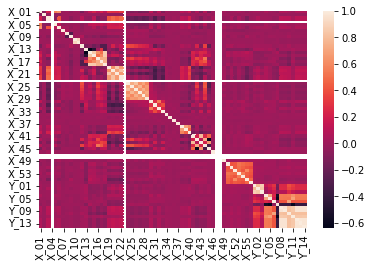

In [ ]:
#히트맵 그리기
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.heatmap(train.corr())

In [ ]:
# train, test set 합치기
data = pd.concat([train, test], axis =0)

In [ ]:
data.isnull().sum()

ID          0
X_01        0
X_02        0
X_03        0
X_04        0
        ...  
Y_10    39608
Y_11    39608
Y_12    39608
Y_13    39608
Y_14    39608
Length: 71, dtype: int64

In [ ]:
# 각 컬럼에 있는 요소 갯수 파악
len(data['X_01'].unique())

33

In [ ]:
unique_len=data.apply(lambda x : len(x.unique()))

In [ ]:
unique_len

ID      79215
X_01       33
X_02        2
X_03      298
X_04        1
        ...  
Y_10     4459
Y_11     4310
Y_12     3674
Y_13     3666
Y_14     3683
Length: 71, dtype: int64

In [ ]:
# 1. 1단위
# 2. 10단위
# 3. 100단위
# 4. 1000단위
# 5. 10000단위

# 요소 개수별로 그룹화 해봄


In [ ]:
group_1= unique_len[unique_len <=9].index

In [ ]:
group_2= unique_len[(unique_len >9) & (unique_len <=99)].index

In [ ]:
group_3= unique_len[(unique_len >99) & (unique_len <=999)].index

In [ ]:
group_4=unique_len[(unique_len >999) & (unique_len <=9999)].index

In [ ]:
group_5=unique_len[(unique_len >9999) & (unique_len <=99999)].index

In [ ]:
data[group_3].head()

,X_03,X_05,X_33,X_38,X_39,X_40
0,67.47,101.892,1.74,-16.41,-16.36,-17.03
1,65.17,101.944,1.66,-16.06,-16.11,-16.74
2,64.07,103.153,1.68,-16.16,-16.17,-16.76
3,67.57,101.971,1.68,-16.05,-16.03,-16.67
4,63.57,101.981,1.82,-16.25,-16.23,-16.85


In [ ]:
# 그룹3의 각 컬럼을 구간화하여 성능을 높여보자

data['X_03'].min()

55.57

In [ ]:
data['X_03'].max()

89.17

In [ ]:
len(data['X_03'].unique())

298

In [ ]:
import numpy as np

In [ ]:
#  먼저 그룹3 구간화 해보자
counts, bin_dividers = np.histogram(data['X_03'], bins=7)


In [ ]:
 data['X_03']=pd.factorize(pd.cut(data['X_03'], bins = bin_dividers, include_lowest=True, labels= [0,1,2,3,4,5,6]))[0]

In [ ]:
counts, bin_dividers2 = np.histogram(data['X_05'], bins =7)

In [ ]:
data['X_05']=pd.factorize(pd.cut(data['X_05'], bins = bin_dividers2, include_lowest=True, labels= [0,1,2,3,4,5,6]))[0]

In [ ]:
counts, bin_dividers3 = np.histogram(data['X_33'], bins =7)

In [ ]:
data['X_33']=pd.factorize(pd.cut(data['X_33'], bins = bin_dividers3, include_lowest=True, labels= [0,1,2,3,4,5,6]))[0]

In [ ]:
#X_38	X_39	X_40 음수

In [ ]:
# 같은 작업을 반복하기위해 하나의 함수로 만들어보았다.

def make_bin(array, n):
  array= - array
  _, bin_dividers=np.histogram(array, bins = n)
  cut_categories = pd.cut(array, bin_dividers, labels = [i for i in range(n)], include_lowest=True)
  bined_array = pd.factorize(cut_categories)[0]
  return bined_array

In [ ]:
pd.Series(make_bin(data['X_38'],10 )).value_counts()

0    79153
1       61
2        1
dtype: int64

In [ ]:
data['X_38'] = make_bin(data['X_38'], 10)
data['X_39'] = make_bin(data['X_39'], 6)
data['X_40'] = make_bin(data['X_40'], 4)

In [ ]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(42) # Seed 고정

In [ ]:
data[group_3].head()

,X_03,X_05,X_33,X_38,X_39,X_40
0,-1,0,0,0,0,0
1,-1,1,0,0,0,1
2,-1,2,0,0,0,1
3,-1,1,0,0,0,1
4,-1,1,1,0,0,1


In [ ]:
# 그룹 1) 그룹화 구간나누기
data[group_1].head()

,X_02,X_04,X_10,X_11,X_23,X_47,X_48
0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0


In [ ]:
counts, bin_dividers5 = np.histogram(data['X_02'], bins =7)
data['X_02']=pd.factorize(pd.cut(data['X_02'], bins = bin_dividers5, include_lowest=True, labels= [0,1,2,3,4,5,6]))[0]

In [ ]:
counts, bin_dividers6 = np.histogram(data['X_10'], bins =7)
data['X_10']=pd.factorize(pd.cut(data['X_10'], bins = bin_dividers6, include_lowest=True, labels= [0,1,2,3,4,5,6]))[0]

In [ ]:
counts, bin_dividers7 = np.histogram(data['X_11'], bins =7)
data['X_11']=pd.factorize(pd.cut(data['X_11'], bins = bin_dividers7, include_lowest=True, labels= [0,1,2,3,4,5,6]))[0]

In [ ]:
data['X_04'] = make_bin(data['X_04'], 10)
data['X_23'] = make_bin(data['X_23'], 10)
data['X_47'] = make_bin(data['X_47'], 10)
data['X_48'] = make_bin(data['X_48'], 10)

In [ ]:
# 그룹 2) 구간화
data[group_2].head()

,X_01,X_06,X_12,X_13,X_14,X_15,X_16,X_17,X_18,X_19,...,X_34,X_35,X_36,X_37,X_41,X_42,X_43,X_44,X_45,X_46
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,1,1,0,1,1,...,1,0,0,1,0,0,1,1,1,0
2,1,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,1,1,1,1
3,0,1,0,0,1,1,0,0,1,0,...,1,1,2,2,0,0,1,0,2,1
4,0,2,0,1,0,1,0,0,1,0,...,0,0,0,1,0,1,1,1,2,1


In [ ]:
data['X_01'] = make_bin(data['X_01'], 7)
data['X_06'] = make_bin(data['X_06'], 7)
data['X_12'] = make_bin(data['X_12'], 7)
data['X_13'] = make_bin(data['X_13'], 7)
data['X_14'] = make_bin(data['X_14'], 7)
data['X_15'] = make_bin(data['X_15'], 7)
data['X_16'] = make_bin(data['X_16'], 7)
data['X_17'] = make_bin(data['X_17'], 7)
data['X_18'] = make_bin(data['X_18'], 7)
data['X_19'] = make_bin(data['X_19'], 7)
data['X_20'] = make_bin(data['X_20'], 7)
data['X_21'] = make_bin(data['X_21'], 7)
data['X_22'] = make_bin(data['X_22'], 7)
data['X_24'] = make_bin(data['X_24'], 7)
data['X_25'] = make_bin(data['X_25'], 7)
data['X_26'] = make_bin(data['X_26'], 7)
data['X_27'] = make_bin(data['X_27'], 7)
data['X_28'] = make_bin(data['X_28'], 7)
data['X_29'] = make_bin(data['X_29'], 7)
data['X_30'] = make_bin(data['X_30'], 7)
data['X_31'] = make_bin(data['X_31'], 7)
data['X_32'] = make_bin(data['X_32'], 7)
data['X_34'] = make_bin(data['X_34'], 7)
data['X_35'] = make_bin(data['X_35'], 7)
data['X_36'] = make_bin(data['X_36'], 7)
data['X_37'] = make_bin(data['X_37'], 7)
data['X_41'] = make_bin(data['X_41'], 7)
data['X_42'] = make_bin(data['X_42'], 7)
data['X_43'] = make_bin(data['X_43'], 7)
data['X_44'] = make_bin(data['X_44'], 7)
data['X_45'] = make_bin(data['X_45'], 7)
data['X_46'] = make_bin(data['X_46'], 7)

In [ ]:
# 그룹 4 그룹화 구간화
data[group_4].head()

,X_07,Y_01,Y_02,Y_03,Y_06,Y_07,Y_08,Y_09,Y_10,Y_11,Y_12,Y_13,Y_14
0,0,2.056,1.456,1.680,16.083,4.276,-25.381,-25.529,-22.769,23.792,-25.470,-25.409,-25.304
1,0,1.446,1.184,1.268,16.736,3.229,-26.619,-26.523,-22.574,24.691,-26.253,-26.497,-26.438
2,0,1.251,0.665,0.782,17.080,2.839,-26.238,-26.216,-22.169,24.649,-26.285,-26.215,-26.370
3,0,1.464,1.079,1.052,17.143,3.144,-25.426,-25.079,-21.765,24.913,-25.254,-25.021,-25.345
4,0,0.983,0.646,0.689,17.569,3.138,-25.376,-25.242,-21.072,25.299,-25.072,-25.195,-24.974


In [ ]:
data['X_07'] = make_bin(data['X_07'], 7)


In [ ]:
# 그룹 5 )구간화
data[group_5].head()


,ID,X_08,X_09,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56,Y_04,Y_05
0,39608,0,0,0,0,0,0,0,0,0,0,10.502,29.632
1,39609,0,0,0,0,0,0,1,0,0,0,18.507,33.179
2,39610,0,0,0,0,0,0,0,0,0,0,14.082,31.801
3,39611,0,0,0,0,0,0,0,0,0,0,16.975,34.503
4,39612,0,0,0,1,0,0,0,0,0,0,15.047,32.602


In [ ]:
data[group_5].apply(lambda x : len(x.unique()))

ID      79215
X_08    19711
X_09    13261
X_49    59711
X_50    77303
X_51    77246
X_52    77292
X_53    77186
X_54    76999
X_55    77404
X_56    76963
Y_04    10774
Y_05    10242
dtype: int64

In [ ]:
#ID 레이블 인코더 
from sklearn import preprocessing 

In [ ]:
label_encoder = preprocessing.LabelEncoder()

In [ ]:
data['ID'].unique()

array(['TRAIN_00001', 'TRAIN_00002', 'TRAIN_00003', ..., 'TEST_39606',
       'TEST_39607', 'TEST_39608'], dtype=object)

In [ ]:
data['ID']=label_encoder.fit_transform(data['ID'])

In [ ]:

data['X_08'] = make_bin(data['X_08'], 7)
data['X_09'] = make_bin(data['X_09'], 7)
data['X_49'] = make_bin(data['X_49'], 7)
data['X_50'] = make_bin(data['X_50'], 7)
data['X_51'] = make_bin(data['X_51'], 7)
data['X_52'] = make_bin(data['X_52'], 7)
data['X_53'] = make_bin(data['X_53'], 7)
data['X_54'] = make_bin(data['X_54'], 7)
data['X_55'] = make_bin(data['X_55'], 7)
data['X_56'] = make_bin(data['X_56'], 7)


## Data Load

In [ ]:
train_df = pd.read_csv('./train.csv')

In [ ]:
train_x = train_df.filter(regex='X') # Input : X Featrue
train_y = train_df.filter(regex='Y') # Output : Y Feature

## Regression Model Fit

In [ ]:
LR = MultiOutputRegressor(LinearRegression()).fit(train_x, train_y)
print('Done.')

Done.


## Inference

In [ ]:
test_x = pd.read_csv('./test.csv').drop(columns=['ID'])

In [ ]:
preds = LR.predict(test_x)
print('Done.')

Done.


## Submit

In [ ]:
submit = pd.read_csv('./sample_submission.csv')

In [ ]:
for idx, col in enumerate(submit.columns):
    if col=='ID':
        continue
    submit[col] = preds[:,idx-1]
print('Done.')

Done.


In [ ]:
submit.to_csv('./submit.csv', index=False)